In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df_districts = gpd.read_file('data/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.geojson')

<AxesSubplot: >

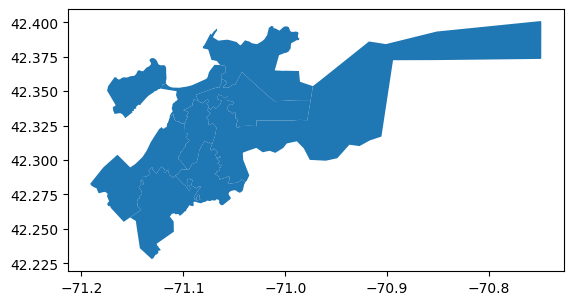

In [70]:
# df_places['geometry']
df_districts['geometry'].plot()

In [89]:
df_tracts = gpd.read_file('data/cb_2021_25_tract_500k.geojson')
df_tracts = df_tracts.rename({'NAME': 'tract'}, axis=1)
df_tracts = df_tracts.query('NAMELSADCO == "Suffolk County"')
df_tracts = df_tracts[['tract', 'geometry']]

In [90]:
df_tracts

,tract,geometry
1190,1.01,"POLYGON Z ((-71.13660 42.36016 0.00000, -71.13..."
1191,1.02,"POLYGON Z ((-71.16090 42.35863 0.00000, -71.15..."
1192,2.01,"POLYGON Z ((-71.16764 42.35379 0.00000, -71.16..."
1193,2.02,"POLYGON Z ((-71.16057 42.35267 0.00000, -71.16..."
1194,3.01,"POLYGON Z ((-71.17394 42.35340 0.00000, -71.17..."
...,...,...
1420,9816,"POLYGON Z ((-70.99939 42.38833 0.00000, -71.00..."
1421,9817,"POLYGON Z ((-71.07256 42.35544 0.00000, -71.07..."
1422,9818,"POLYGON Z ((-71.12572 42.31843 0.00000, -71.12..."
1423,9819,"POLYGON Z ((-71.18531 42.27950 0.00000, -71.18..."


<AxesSubplot: >

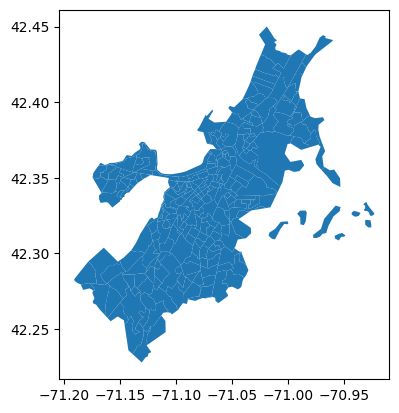

In [91]:
df_tracts['geometry'].plot()


In [112]:
df = pd.read_csv(
    'data/ACSDP5Y2021.DP03_2023-04-16T204655/ACSDP5Y2021.DP03-Data.csv')
df.dropna(inplace=True, axis='columns')
df.head()


,GEO_ID,NAME,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,DP03_0004M,...,DP03_0133PE,DP03_0133PM,DP03_0134PE,DP03_0134PM,DP03_0135PE,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM
0,Geography,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,Estimate!!EMPLOYMENT STATUS!!Population 16 yea...,Margin of Error!!EMPLOYMENT STATUS!!Population...,...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error!!PERCENTAGE OF FAMILIE...
1,0400000US25,Massachusetts,5773906,1782,3882484,8294,3876978,8309,3667019,9319,...,9.3,0.1,9.3,0.2,9.5,0.2,6.8,0.2,20.9,0.3
2,1400000US25025000101,"Census Tract 1.01, Suffolk County, Massachusetts",1638,271,1209,247,1209,247,1132,225,...,11.8,6.5,12.8,7.1,0.0,27.5,0.0,5.5,17.0,9.6
3,1400000US25025000102,"Census Tract 1.02, Suffolk County, Massachusetts",3488,745,2847,744,2847,744,2795,750,...,19.3,6.1,18.3,6.4,29.4,20.4,16.5,10.9,22.1,7.6
4,1400000US25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",3668,438,3222,424,3222,424,2982,394,...,10.9,5.8,10.5,6.0,14.5,17.6,17.2,21.3,12.3,5.8


In [93]:
import re

df['tract'] = (df['NAME']
    .map(lambda x: re.search(r'[^\d]*(\d+\.\d+|\d+)', x))
    .map(lambda x: x.group(1) if x != None else ''))

df['tract']

0             
1             
2         1.01
3         1.02
4         2.01
        ...   
233       9817
234       9818
235       9819
236    9901.01
237           
Name: tract, Length: 238, dtype: object

In [94]:
df[['tract', 'DP03_0128PE']]

,tract,DP03_0128PE
0,,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHO...
1,,9.9
2,1.01,10.4
3,1.02,19.3
4,2.01,14.7
...,...,...
233,9817,-
234,9818,0.0
235,9819,-
236,9901.01,-


In [95]:
df_tracts

,tract,geometry
1190,1.01,"POLYGON Z ((-71.13660 42.36016 0.00000, -71.13..."
1191,1.02,"POLYGON Z ((-71.16090 42.35863 0.00000, -71.15..."
1192,2.01,"POLYGON Z ((-71.16764 42.35379 0.00000, -71.16..."
1193,2.02,"POLYGON Z ((-71.16057 42.35267 0.00000, -71.16..."
1194,3.01,"POLYGON Z ((-71.17394 42.35340 0.00000, -71.17..."
...,...,...
1420,9816,"POLYGON Z ((-70.99939 42.38833 0.00000, -71.00..."
1421,9817,"POLYGON Z ((-71.07256 42.35544 0.00000, -71.07..."
1422,9818,"POLYGON Z ((-71.12572 42.31843 0.00000, -71.12..."
1423,9819,"POLYGON Z ((-71.18531 42.27950 0.00000, -71.18..."


In [96]:


df_analysis = df[['tract', 'DP03_0128PE']].merge(df_tracts, left_on='tract', right_on='tract')

df_analysis

,tract,DP03_0128PE,geometry
0,1.01,10.4,"POLYGON Z ((-71.13660 42.36016 0.00000, -71.13..."
1,1.02,19.3,"POLYGON Z ((-71.16090 42.35863 0.00000, -71.15..."
2,2.01,14.7,"POLYGON Z ((-71.16764 42.35379 0.00000, -71.16..."
3,2.02,19.7,"POLYGON Z ((-71.16057 42.35267 0.00000, -71.16..."
4,3.01,6.3,"POLYGON Z ((-71.17394 42.35340 0.00000, -71.17..."
...,...,...,...
230,9816,-,"POLYGON Z ((-70.99939 42.38833 0.00000, -71.00..."
231,9817,-,"POLYGON Z ((-71.07256 42.35544 0.00000, -71.07..."
232,9818,0.0,"POLYGON Z ((-71.12572 42.31843 0.00000, -71.12..."
233,9819,-,"POLYGON Z ((-71.18531 42.27950 0.00000, -71.18..."


/opt/homebrew/lib/python3.11/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<AxesSubplot: >

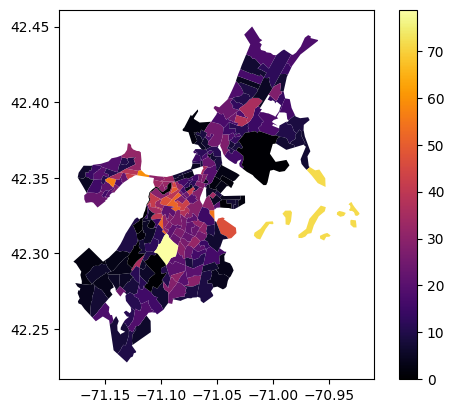

In [119]:
df_analysis = gpd.GeoDataFrame(df_analysis)
# df_analysis.dropna(subset=['DP03_0128PE'], axis=0)
# df_analysis.fillna(0.0)

df_analysis['DP03_0128PE'] = pd.to_numeric(
    df_analysis['DP03_0128PE'], errors='coerce')

df_analysis.dropna()

# df_analysis['geometry'].plot()
# with plt.style.context(("seaborn", "ggplot")):
df_analysis.plot("DP03_0128PE", legend=True, colormap='inferno')

# df_analysis.to_file('data/test.geojson')

<AxesSubplot: >

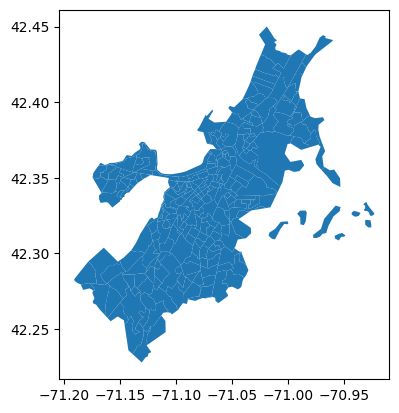

In [98]:
df_tracts['geometry'].plot()